This notebook contains a walk-through of the sound change simulation that was presented in Chapter 2 of my dissertation, *Functionalism, Lexical Contrast and Sound Change*.

#1. Introduction
First, we import some standard modules like Random, Numpy and Matplotlib.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

Next, we need to define an alphabet for our lexicon, and map our alphabet to indexes for computation purposes.

I created two dictionaries that are used to encode consonant and vowel symbols.

The vowel dictionary maps 15 different symbols onto different indexes.
The consonant dictionary maps 26 different symbols onto different indexes.




In [2]:
vowels = {'i': 0, 'e': 1, 'a': 2, 'o': 3, 'u': 4, 'ou':5, 'ei':6, 'ea':7, 'ee':8, 'oo':9, 'ai':10, 'oa':11,
          'oi':12, 'io':13, 'ie':14}

consonants = {'m': 0, 'p':1, 'b':2, 'f': 3, 'v': 4, 'd': 5, 't': 6, 'l': 7, 'n': 8, 'r': 9, 's': 10, 'k': 11,
              'y': 12, 'g': 13, 'j':14, 'h': 15, 'c':16, ' ':17, 'th':18, 'sh':19, 'wh':20, 'ch':21, 'tw':22,
              'x':23, 'w':24, 'z':25}

With this dictionary, we can represent each word as an integer tuple. Words are initially read from a text file
in the form of 3-dimensional tuples of the type (Onset, Nucleus, Coda). For instance the word "dog" will be 
processed in the form of a 3-dimensional tuple ```('d', 'o', 'g')```. 

Then, we can use the two dictionaries to transform 
each word into a integer vector, through a helper function.


In [3]:
dog = ('d', 'o', 'g')

def vectorize(word):
    onset, nucleus, coda = word
    return consonants[onset], vowels[nucleus], consonants[coda]


For instance, the word "dog" will be transformed in the tuple ```(5, 3, 13)```.

In [4]:
print(vectorize(dog))

(5, 3, 13)


The lexicon is a list of words (=tuples), and is stored as a global variable, since we need to modify it as sound change
occurs. A wordlist containing the words "dog", "cat", and "pig" is represented by the following variable.

In [5]:
wordlist = [('d', 'o', 'g'), ('c', 'a', 't'), ('p', 'i', 'g')]


Since we want to keep track of the number of symbols and the possible phonological environments, we also store three sets that
contain the onsets, nuclei and codas available in the lexicon in its current state. These three sets are all 
global variables.

In [6]:
def get_onset(wordlist):
    return {word[0] for word in wordlist}

def get_nucleus(wordlist):
    return {word[1] for word in wordlist}

def get_coda(wordlist):
    return {word[2] for word in wordlist}


Let's extract the onsets, nuclei and codas of the current wordlist.

In [7]:
onset, nucleus, coda = get_onset(wordlist), get_nucleus(wordlist), get_coda(wordlist)

print(onset)
print(nucleus)
print(coda)

{'d', 'p', 'c'}
{'i', 'a', 'o'}
{'g', 't'}


For illustratory purposes, we need a reverse-dictionary, which can be used to retrieve the symbols given their index,
and a helper function to retrieve the word (in string format) given its integer vector representation:

In [8]:
rev_vowels = {code: letter for letter, code in vowels.items()}
rev_consonants = {code: letter for letter, code in consonants.items()}


def vectorize_inverse(word):
    onset, nucleus, coda = word
    return rev_consonants[onset] + rev_vowels[nucleus] + rev_consonants[coda]



By calling the function on the tuple ```(5,3,13)```, we will get the word "dog" back.


In [9]:
dog = (5, 3, 13)
print(vectorize_inverse(dog))

dog


Another helper function that we need is a function that returns the average Levenshtein distance within a wordlist:

In [10]:
def average(wordlist):
    av_length = []
    for index, word in enumerate(wordlist):
        for word2 in wordlist[index+1:]:
            lev = 0
            for i, letter in enumerate(word):
                if word2[i] != letter:
                    lev += 1
            av_length.append(lev)
    return round(sum(av_length)/len(av_length),3)


The average distance of our current lexicon should be:

[ d(dog,cat) + d(dog,pig) + d(cat,pig) ] /3:

(3 + 2 + 3) / 3 : 

8 / 3 = 2.667

In [11]:
print(average(wordlist))

2.667


Now that the lexicon, the alphabet and the helper functions are defined, we can move to sound change!

#2. Sound change functions

This part defines the sound change functions. These functions modify the lexicon by simulating sound changes.

The first function represents a sound change that targets the onset of the word. The comments on the function explain how we implement a sound change that targets the onset position of the artificial language (as described in 2.2.2). 

Depending on the outcome, the change might result in an unconditioned merger, a conditioned merger, a split, or a simple phonetic change. For more information, cf. 2.2.2 in the dissertation.

In [12]:
def change_onset():
    #call the lexicon list and the onset set
    global lexicon, onset
    #prepare a new empty list, that will be filled with the form of the words after the sound change applies
    new_lexicon = []
    #pick an onset at random and name it target. This is the target of the sound change
    target = random.choice(list(onset))
    #pick an onset at random and name it outcome. This is the outcome of the sound change
    outcome = random.choice(list(rev_consonants))
    #select a random subset of nuclei as the conditioning environment
    environment = random.sample(nucleus, random.randint(0, len(nucleus) - 1))
    #apply the change to the lexicon
    for word in lexicon:
        #check words where target is the onset
        if word[0] == target:
            #determine whether the nucleus is in the conditioning environment
            if word[1] in environment:
                #if the nucleus is in the conditioning environment, then change target into outcome
                new_lexicon.append((outcome, word[1], word[2]))
            else:
                #if not, the change does not apply
                new_lexicon.append(word)
        else:
            #if the word does not start with target, the change does not apply
            new_lexicon.append(word)
    #this prints a line describing the change that happened
    print('/' + rev_consonants[target] + '/ becomes /' + rev_consonants[outcome] + '/ in onset before ['
          + ' '.join([rev_vowels[index] for index in environment]) + ']')
    #Update lexicon and onsets
    lexicon = new_lexicon
    onset = get_onset(lexicon)



Let's try the function. All we need is to transform the words in the wordlist in their vectorizes representation, and store the type of onsets, nuclei and codas. Then we can apply some sound changes.

In [13]:
wordlist = [('d', 'o', 'g'), ('c', 'a', 't'), ('p', 'i', 'g')]
lexicon = [vectorize(word) for word in wordlist]
onset, nucleus, coda = get_onset(lexicon), get_nucleus(lexicon), get_coda(lexicon)
for iteration in range(5):
  change_onset()


/c/ becomes /tw/ in onset before [a i]
/d/ becomes /y/ in onset before [a]
/tw/ becomes /v/ in onset before [i a]
/v/ becomes /k/ in onset before []
/p/ becomes /f/ in onset before [o]


Now let's see how the lexicon looks like after the change. Can you guess the form of the new lexicon?

In [14]:
print([vectorize_inverse(word) for word in lexicon])

['dog', 'vat', 'pig']


With a lexicon of only three words, and changes that only apply to the first symbol of the words, the shape of the lexicon does not change radically.

Now, it's time to add other sound change functions. The following two functions will apply a change to the nucleus of the word. The only difference between the two is whether
the conditioning environment is the onset or the coda.


In [15]:
def change_nucleus():
    #call the lexicon list and the nucleus set
    global lexicon, nucleus
    #prepare a new empty list, that will be filled with the form of the words after the sound change apply
    new_lexicon = []
    #pick a nucleus at random and name it target. This is the target of the sound change
    target = random.choice(list(nucleus))
    #pick a nucleus at random and name it outcome. This is the outcome of the sound change
    outcome = random.choice(list(rev_vowels))
    #select a random subset of onsets as the conditioning environment
    environment = random.sample(onset, random.randint(0, len(onset) - 1))
    #apply the change to the lexicon
    for word in lexicon:
        #check words where target is the nucleus
        if word[1] == target:
            #determine whether the onset is in the conditioning environment
            if word[0] in environment:
                #if the onset is in the conditioning environment, then change target into outcome
                new_lexicon.append((word[0], outcome, word[2]))
            else:
                #if not, the change does not apply
                new_lexicon.append(word)
        else:
            #if the word does not have target, the change does not apply
            new_lexicon.append(word)
    #this prints a line describing the change that happened
    print('/' + rev_vowels[target] + '/ becomes /' + rev_vowels[outcome] + '/ after ['
          + ' '.join([rev_consonants[index] for index in environment]) + ']')
    #Update lexicon and nuclei
    lexicon = new_lexicon
    nucleus = get_nucleus(lexicon)

def change_nucleus2():
    #call the lexicon list and the nucleus set
    global lexicon, nucleus
    #prepare a new empty list, that will be filled with the form of the words after the sound change apply
    new_lexicon = []
    #pick a nucleus at random and name it target. This is the target of the sound change
    target = random.choice(list(nucleus))
    #pick a nucleus at random and name it outcome. This is the outcome of the sound change
    outcome = random.choice(list(rev_vowels))
    #select a random subset of codas as the conditioning environment
    environment = random.sample(coda, random.randint(0, len(coda) - 1))
    #apply the change to the lexicon
    for word in lexicon:
        #check words where target is the nucleus
        if word[1] == target:
            #determine whether the coda is in the conditioning environment
            if word[2] in environment:
                #if the coda is in the conditioning environment, then change target into outcome
                new_lexicon.append((word[0], outcome, word[2]))
            else:
                #if not, the change does not apply
                new_lexicon.append(word)
        else:
            #if the word does not have target, the change does not apply
            new_lexicon.append(word)
    print('/' + rev_vowels[target] + '/ becomes /' + rev_vowels[outcome] + '/ before ['
          + ' '.join([rev_consonants[index] for index in environment]) + ']')
    #Update lexicon and nuclei
    lexicon = new_lexicon
    nucleus = get_nucleus(lexicon)

The last function targets the coda of the word instead.

In [16]:
def change_coda():
    #call the lexicon list and the coda set
    global lexicon, coda
    #prepare a new empty list, that will be filled with the form of the words after the sound change apply
    new_lexicon = []
    #pick a coda at random and name it target. This is the target of the sound change
    target = random.choice(list(coda))
    #pick a coda at random and name it outcome. This is the outcome of the sound change
    outcome = random.choice(list(rev_consonants))
    #select a random subset of nuclei as the conditioning environment
    environment = random.sample(nucleus, random.randint(0, len(nucleus) - 1))
    #apply the change to the lexicon
    for word in lexicon:
        #check words where target is the coda
        if word[2] == target:
            #determine whether the nucleus is in the conditioning environment
            if word[1] in environment:
                #if the nucleus is in the conditioning environment, then change target into outcome
                new_lexicon.append((word[0], word[1], outcome))
            else:
                #if not, the change does not apply
                new_lexicon.append(word)
        else:
            #if the word does not end with target, the change does not apply
            new_lexicon.append(word)
    print('/' + rev_consonants[target] + '/ becomes /' + rev_consonants[outcome] + '/ in coda after ['
          + ' '.join([rev_vowels[index] for index in environment]) + ']')
    #Update lexicon and onsets
    lexicon = new_lexicon
    coda = get_coda(lexicon)

Now, let's repeat the previous experiments, with a larger vocabulary and a larger inventory of sound changes. 

In [17]:
wordlist = [('d', 'o', 'g'), ('c', 'a', 't'), ('p', 'i', 'g'), ('c','o','w'), ('r','a','t'), ('b', 'ee', ' '), ('f','i','sh')]

lexicon = [vectorize(word) for word in wordlist]
onset, nucleus, coda = get_onset(lexicon), get_nucleus(lexicon), get_coda(lexicon)
for iteration in range(5):
  change_onset()
  change_nucleus()
  change_nucleus2()
  change_coda()



/f/ becomes / / in onset before [ee]
/o/ becomes /oo/ after [f b]
/ee/ becomes /i/ before [w sh]
/w/ becomes /m/ in coda after []
/f/ becomes /sh/ in onset before [o i a]
/a/ becomes /oo/ after [r]
/ee/ becomes /oa/ before [  t]
/sh/ becomes /wh/ in coda after []
/p/ becomes /m/ in onset before [o a oo i]
/a/ becomes /a/ after [c r b d]
/a/ becomes /o/ before [  w]
/ / becomes /g/ in coda after []
/sh/ becomes /k/ in onset before [oo]
/oo/ becomes /i/ after [sh b]
/i/ becomes /u/ before [t  ]
/ / becomes /m/ in coda after [oo o i a]
/m/ becomes /ch/ in onset before []
/i/ becomes /ai/ after []
/oa/ becomes /ei/ before [sh]
/ / becomes /r/ in coda after [i o oa oo]


Now we see that more changes occurr, and as a consequence the lexicon also changes drastically.

In [18]:
print([vectorize_inverse(word) for word in lexicon])

['dog', 'cat', 'mig', 'cow', 'root', 'boar', 'shish']


We can keep track of the average distance of the vocabulary by means of our ```average()``` function.

In [19]:
print('The average distance at the beginning is %s' % average(wordlist))
print('The average distance at the end is %s' % average(lexicon))

The average distance at the beginning is 2.714
The average distance at the end is 2.762


#3. Simulation

Finally, we can run several sound change simulations, and keep track of the average distance and the number of phonemes in the lexicon during the simulations, by plotting them on a graph.

In addition to the wordlist, we should just specify the number of iterations and the number sound changes to apply.



Streaming output truncated to the last 5000 lines.
/ie/ becomes /ou/ before []
/n/ becomes /y/ in coda after [o oo]
/r/ becomes /p/ in onset before [oo]
/y/ becomes /b/ in coda after [oo ie]
/oo/ becomes /ou/ before [b]
/l/ becomes /t/ in onset before [o]
/o/ becomes /ai/ after [l]
/x/ becomes /k/ in coda after [ie]
/ou/ becomes /ee/ after [r]
/ou/ becomes /u/ before []
/y/ becomes /wh/ in coda after [ie o]
/r/ becomes /ch/ in onset before []
/k/ becomes /h/ in coda after []
/r/ becomes /ch/ in onset before []
/ou/ becomes /oi/ before []
/ie/ becomes /oa/ after [l]
/oa/ becomes /ai/ before [k]
/k/ becomes /b/ in coda after [ai ou]
/o/ becomes /oi/ before []
/ou/ becomes /oo/ after [r]
/b/ becomes /j/ in coda after []
/r/ becomes /g/ in onset before []
/ai/ becomes /o/ before [b]
/wh/ becomes /ch/ in coda after [o]
/ch/ becomes /th/ in coda after []
/ou/ becomes /u/ before []
/r/ becomes /x/ in onset before []
/r/ becomes /w/ in onset before [ou]
/l/ becomes /ch/ in onset before []
/b/ 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Streaming output truncated to the last 5000 lines.
/u/ becomes /e/ after [s]
/s/ becomes /v/ in onset before []
/o/ becomes /e/ before []
/o/ becomes /oa/ before [v  ]
/ch/ becomes /tw/ in onset before [e ea]
/v/ becomes /s/ in coda after [oa ea]
/s/ becomes /w/ in onset before [ea]
/r/ becomes /f/ in coda after []
/e/ becomes /ea/ before [r]
/oa/ becomes /ai/ after [tw]
/e/ becomes /e/ before [ ]
/e/ becomes /oo/ before []
/v/ becomes /p/ in coda after [oa e]
/e/ becomes /ai/ after [s]
/ / becomes /g/ in coda after [ea]
/r/ becomes /c/ in coda after []
/p/ becomes /ch/ in coda after [ea ai oa]
/r/ becomes /w/ in coda after [ea]
/tw/ becomes /y/ in onset before [ea]
/p/ becomes /l/ in coda after []
/ / becomes /p/ in coda after [oa e]
/ea/ becomes /io/ after []
/ea/ becomes /i/ before []
/ea/ becomes /ai/ before [p w]
/tw/ becomes /sh/ in onset before []
/ / becomes /f/ in coda after []
/p/ becomes /w/ in coda after [e ai]
/ai/ becomes /o/ before []
/oa/ becomes /oo/ after [th s]
/tw/ 

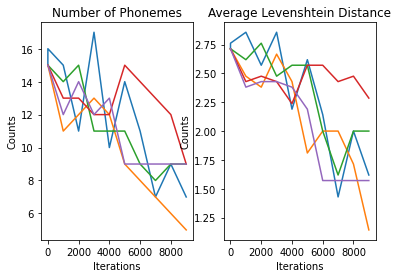

In [23]:
wordlist = [('d', 'o', 'g'), ('c', 'a', 't'), ('p', 'i', 'g'), ('c','o','w'), ('r','a','t'), ('b', 'ee', ' '), ('f','i','sh')]
iterations = 5
n_changes = 10000

for iter in range(iterations):
  print("Iteration number %s started" % (iter+1))
  global onset, nucleus, coda, lexicon
  #this line loads the lexicon in the format described above: a list of integer tuples
  lexicon = [(consonants[word[0]], vowels[word[1]], consonants[word[2]]) for word in wordlist]
  #this line gets the onset, nucleus, and coda sets
  onset, nucleus, coda = get_onset(lexicon), get_nucleus(lexicon), get_coda(lexicon)
  #this line will be used to define the sound change functions used in the simulation and their weight
  #with this setting, each function is equally weighted
  functions = [change_onset, change_nucleus, change_nucleus2, change_coda]
  #we initialize lists that will keep track of the number of the iteration, the number of the phonemes,
  #and the average distance
  x_axis = [0]
  phonemes = [len(onset.union(coda)) + len(nucleus)]
  av_length = [average(lexicon)]
  for n in range(int(n_changes)):
    #this line selects a sound change function at random and applies it
    random.choice(functions)()
    #This line is needed to make the plot lighter. For the toy example in Figure 2.2, the sampling ratio has been reduced to '1'
    if n % 1000 == 0:
      #we update the lists that keep track of the number of the iteration, the number of the phonemes, and the
      #average distance
      x_axis.append(n+1)
      phonemes.append(len(onset.union(coda)) + len(nucleus))
      av_length.append(average(lexicon))
      #this loop prints the shape of the lexicon at the beginning of the simulation and after the sound changes applied
  for index, word in enumerate(lexicon):
    print(''.join(wordlist[index]) + '->' + ''.join(rev_consonants[word[0]] + rev_vowels[word[1]] + rev_consonants[word[2]]))
  print("Iteration number %s finished" % (iter+1))
  #After the simulation has ended, we plot the change in the number of phonemes and in the average distance
  #during the simulation
  #plot phoneme size
  plt.subplot(1, 2, 1)
  plt.plot(x_axis, phonemes)
  #plt.xticks(np.arange(1, 4, step=1)) #This is for the toy example in Figure 2.2
  #plt.yticks(np.arange(36, 39, step=1)) #This is for the toy example in Figure 2.2
  plt.title('Number of Phonemes')
  plt.xlabel('Iterations')
  plt.ylabel('Counts')
  #plot av_length
  plt.subplot(1, 2, 2)
  plt.plot(x_axis, av_length)
  #plt.xticks(np.arange(1, 4, step=1))  #This is for the toy example in Figure 2.2
  plt.title('Average Levenshtein Distance')
  plt.xlabel('Iterations')
  plt.ylabel('Counts')

This is it! Please reach out to me if you have any comment on the project.

Andrea